In [39]:
# Main imports
from catboost import CatBoostClassifier
from utils import clean_and_prepare_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
X, y = clean_and_prepare_data(data)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, shuffle=True, random_state=1, stratify=y)

In [13]:
coef = data['Churn'].value_counts(normalize=True).to_list()
coef

[0.7346301292063041, 0.2653698707936959]

In [22]:
cat_features = data.select_dtypes('category').columns.to_list()
cat_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [74]:
cat = CatBoostClassifier(class_weights=coef,
                        learning_rate=0.1, 
                        cat_features=cat_features, 
                        iterations=1000,
                        loss_function = 'Logloss',
                        task_type="GPU",
                        devices='0:1')

In [75]:
cat.fit(X_train, y_train)

0:	learn: 0.5893188	total: 43.9ms	remaining: 43.8s
1:	learn: 0.5123311	total: 81.6ms	remaining: 40.7s
2:	learn: 0.4558431	total: 121ms	remaining: 40.2s
3:	learn: 0.4130316	total: 160ms	remaining: 39.9s
4:	learn: 0.3792036	total: 202ms	remaining: 40.2s
5:	learn: 0.3547324	total: 247ms	remaining: 40.9s
6:	learn: 0.3346593	total: 292ms	remaining: 41.4s
7:	learn: 0.3222610	total: 322ms	remaining: 39.9s
8:	learn: 0.3118854	total: 354ms	remaining: 39s
9:	learn: 0.3006112	total: 390ms	remaining: 38.6s
10:	learn: 0.2924082	total: 428ms	remaining: 38.4s
11:	learn: 0.2872165	total: 463ms	remaining: 38.2s
12:	learn: 0.2815463	total: 506ms	remaining: 38.4s
13:	learn: 0.2779504	total: 540ms	remaining: 38s
14:	learn: 0.2750900	total: 574ms	remaining: 37.7s
15:	learn: 0.2720333	total: 609ms	remaining: 37.4s
16:	learn: 0.2703876	total: 644ms	remaining: 37.2s
17:	learn: 0.2683214	total: 677ms	remaining: 36.9s
18:	learn: 0.2668804	total: 710ms	remaining: 36.7s
19:	learn: 0.2658544	total: 744ms	remaining

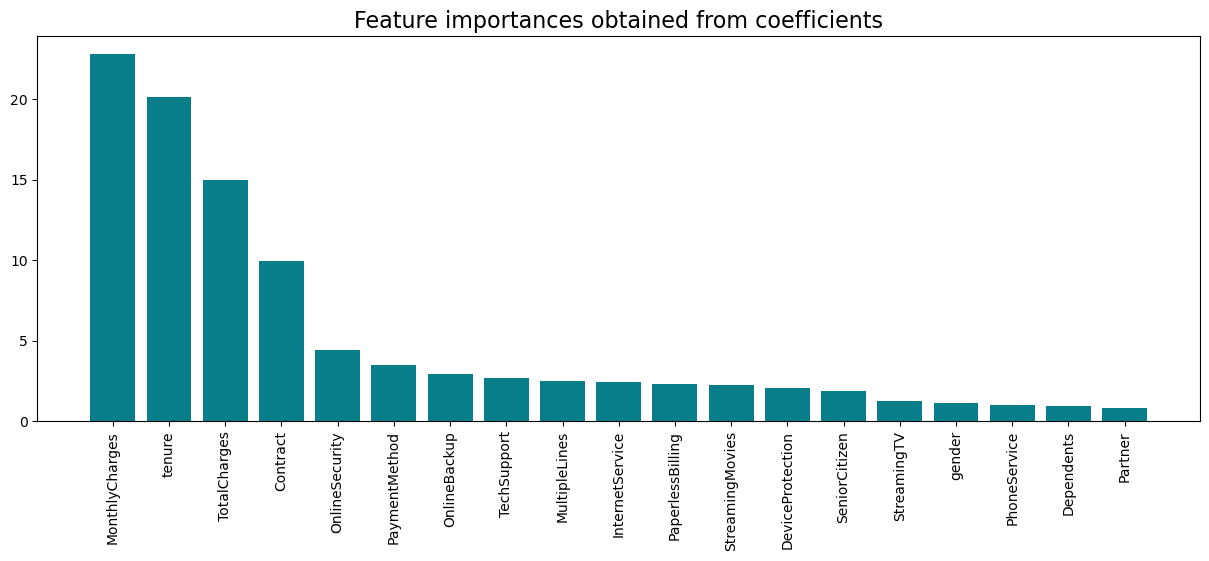

In [76]:
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": cat.feature_importances_
})

sorted_importances = feature_importances.sort_values(by='Importance', ascending=False)
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(x=sorted_importances['Feature'], height=sorted_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=16)
plt.xticks(rotation='vertical')
plt.show()

### Check precision and f-score

In [77]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

y_pred = cat.predict(X_val)
y_pred = np.where(y_pred=='True', 1, 0)
precision = precision_score(y_val, y_pred)
score = f1_score(y_val, y_pred)

print("[INFO] Precision is: ", precision)
print("[INFO] F1-Score is: ", score)

[INFO] Precision is:  0.8055555555555556
[INFO] F1-Score is:  0.36099585062240663


As we can see, the model shows a nice precision score on unbalanced data. The precision is about 80%, so we can trust the model, at least the important coeficients, that model shows. 

The most important features here are:

In [78]:
sorted_importances

,Feature,Importance
17,MonthlyCharges,22.764089
4,tenure,20.148131
18,TotalCharges,14.986831
14,Contract,9.935605
8,OnlineSecurity,4.421522
16,PaymentMethod,3.503444
9,OnlineBackup,2.924737
11,TechSupport,2.710005
6,MultipleLines,2.509591
7,InternetService,2.425219
